## Introduction to Matplotlib
Get straight into plotting data, that's what we're focused on.

Video 0 will be concepts and contain details like anatomy of a figure. The rest of the videos will be pure code based.

0. Concepts in Matplotlib
1. 2 ways of creating plots (pyplot & OO) - use the OO method
2. Plotting data (NumPy arrays), line, scatter, bar, hist, subplots
3. Plotting data directly with Pandas (using the pandas matplotlib wrapper)
4. Plotting data (pandas DataFrames) with the OO method, line, scatter, bar, hist, subplots
5. Cutomizing your plots, `limits`, `colors`, `styles`, `legends`
6. Saving plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

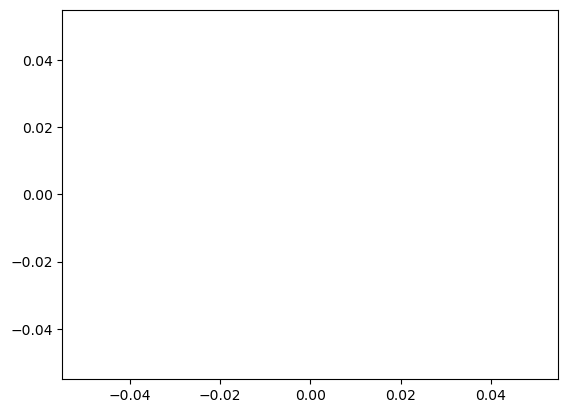

In [2]:
plt.plot();

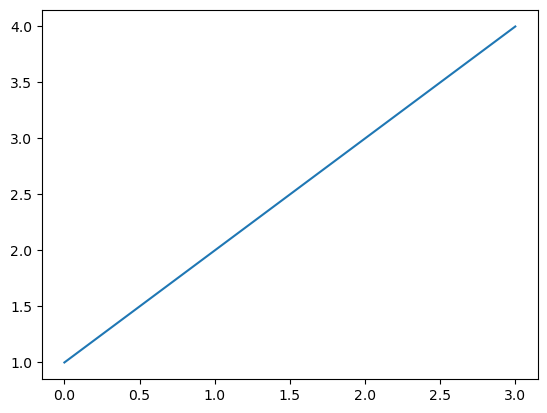

In [3]:
plt.plot([1, 2, 3, 4]);

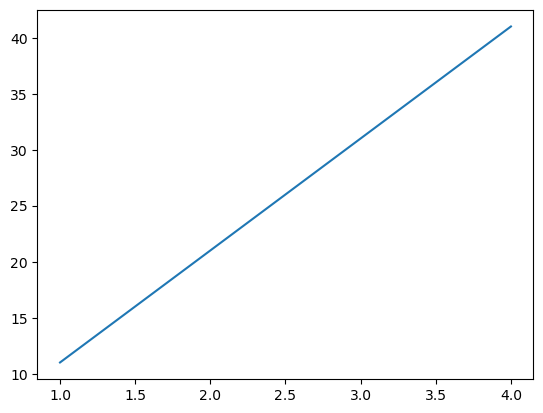

In [4]:
x = [1, 2, 3, 4]
y = [11, 21, 31, 41]
plt.plot(x, y);

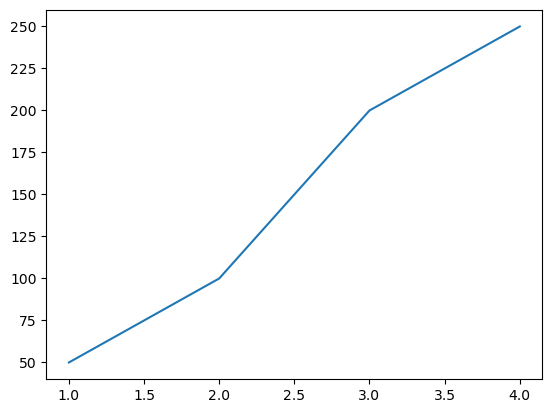

In [5]:
fig, ax = plt.subplots()
ax.plot(x, [50, 100, 200, 250]);

## Matplotlib example workflow

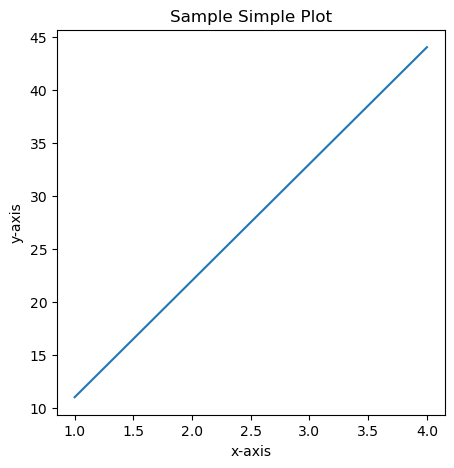

In [6]:
# 0. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(5, 5)) # figSize is `Width` and `Height`

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", 
       xlabel="x-axis", 
       ylabel="y-axis")

# 5. Save & show
fig.savefig("./images/simple-plot.png")

## 2. Making the most common type of plots using NumPy arrays
Most of figuring out what kind of plot to use is getting a feel for the data, then see what suits it best.

Matplotlib visualizations are built off NumPy arrays. So in this section we'll build some of the most common types of plots using NumPy arrays.

* `line`
* `scatter`
* `bar`
* `hist`
* `subplots()`

To make sure we have access to NumPy, we'll import it as `np`.

### Line
Line is the default type of visualization in Matplotlib. Usually, unless specified otherwise, your plots will start out as lines.

In [7]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

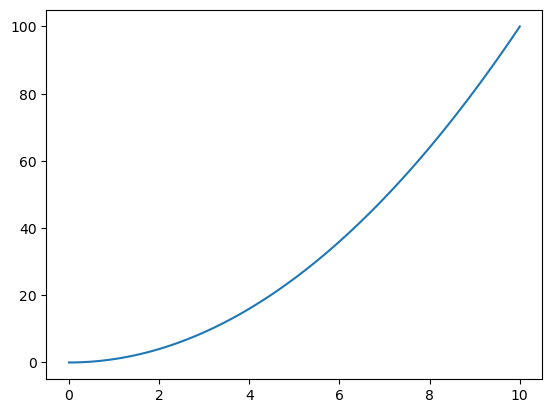

In [8]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**2);

### Scatter

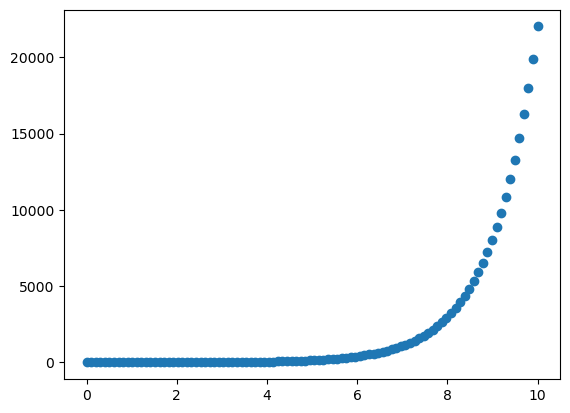

In [9]:
# Need to recreate our figure and axis instances when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

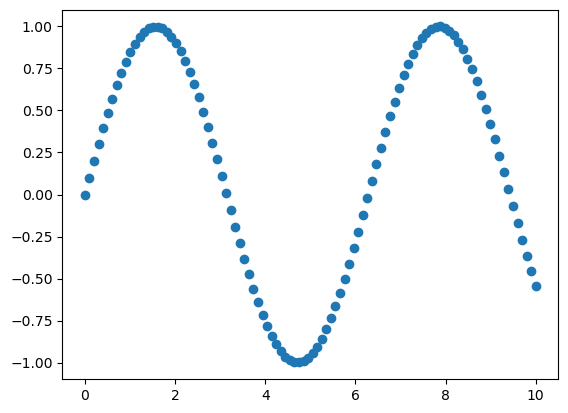

In [10]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

### Bar
* Vertical
* Horizontal

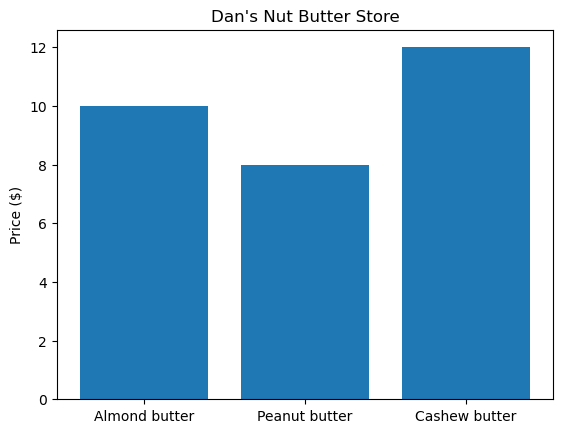

In [11]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

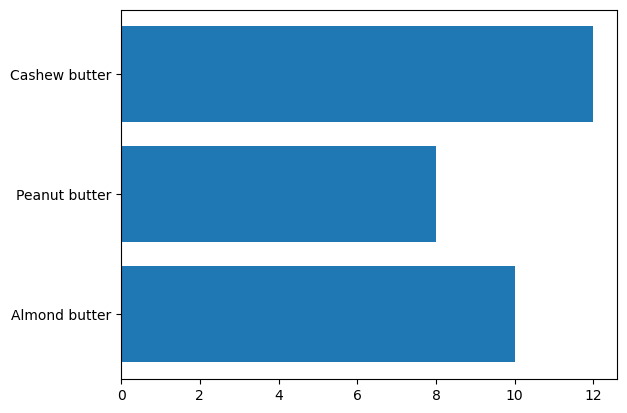

In [12]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

### Histogram (hist)
* Could show image of normal distribution here

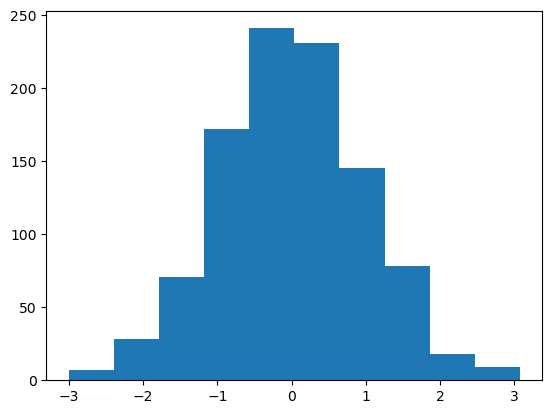

In [13]:
# Make some data from a normal distribution
x = np.random.randn(1000) # pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x);

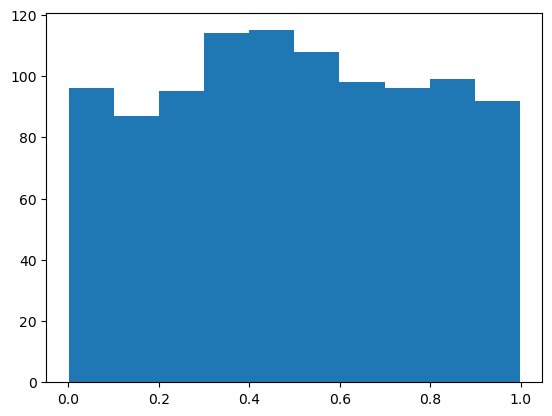

In [14]:
x = np.random.random(1000) # random data from random distribution

fig, ax = plt.subplots()
ax.hist(x);

### Subplots
* Multiple plots on one figure

https://matplotlib.org/3.1.1/gallery/recipes/create_subplots.html

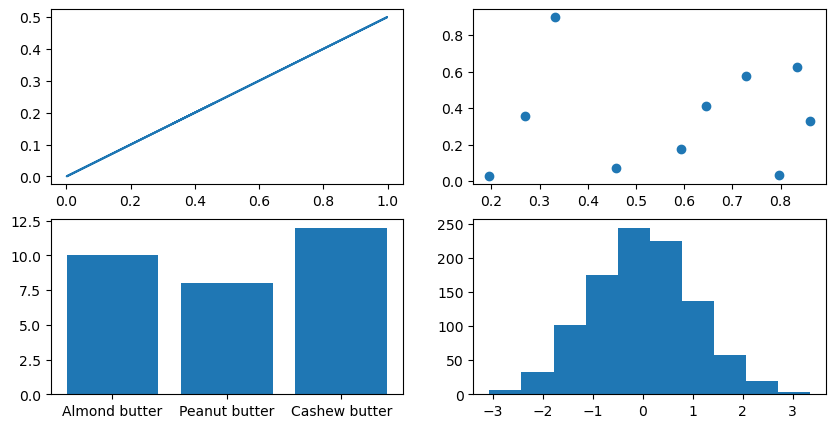

In [15]:
# Option 1: Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10, 5))
# Plot data to each axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

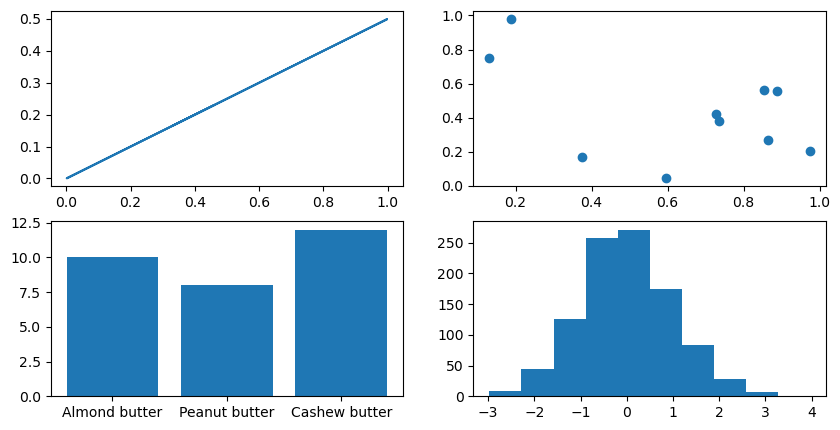

In [16]:
# Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index to plot data
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## 3. Plotting data directly with pandas
This section uses the pandas `pd.plot()` method on a DataFrame to plot columns directly.


* https://datatofish.com/plot-dataframe-pandas/


* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


* `line`


* `scatter`


* `bar`


* `hist`


* `df.plot(subplots=True, figsize=(6, 6))`

To plot data with pandas, we first have to import it as pd.

In [17]:
car_sales = pd.read_csv("./data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


### Line
* Concept
* DataFrame

Often, reading things won't make sense. Practice writing code for yourself, get it out of the docs and into your workspace. See what happens when you run it.

Let's start with trying to replicate the pandas visualization documents.

In [28]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01    0.583872
2020-01-02    0.653781
2020-01-03    0.600323
2020-01-04    1.162919
2020-01-05    0.836001
                ...   
2022-09-22   -0.840161
2022-09-23   -0.783809
2022-09-24   -0.561688
2022-09-25   -1.236168
2022-09-26    0.127188
Freq: D, Length: 1000, dtype: float64

In [29]:
ts = ts.cumsum()
ts

2020-01-01     0.583872
2020-01-02     1.237653
2020-01-03     1.837976
2020-01-04     3.000895
2020-01-05     3.836897
                ...    
2022-09-22    70.535069
2022-09-23    69.751259
2022-09-24    69.189571
2022-09-25    67.953403
2022-09-26    68.080591
Freq: D, Length: 1000, dtype: float64

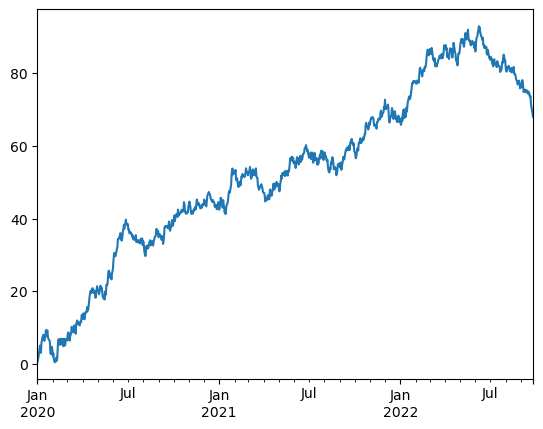

In [30]:
ts.plot();

In [31]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [33]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

C:\Users\Sourav\AppData\Local\Temp\ipykernel_4620\2276578600.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [34]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [35]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [36]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


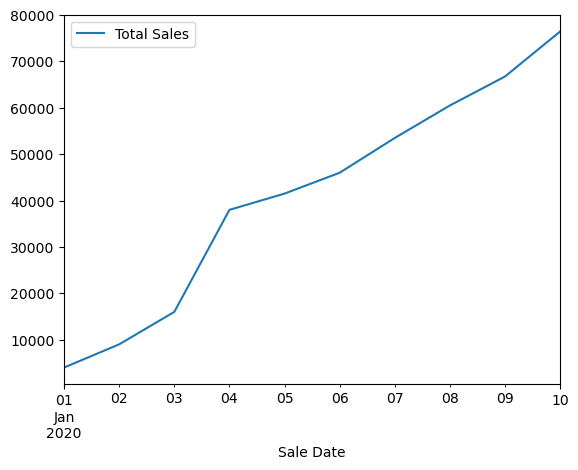

In [37]:
# Let's plot the sales data
car_sales.plot(x="Sale Date", y="Total Sales");

### Scatter
* Concept
* DataFrame

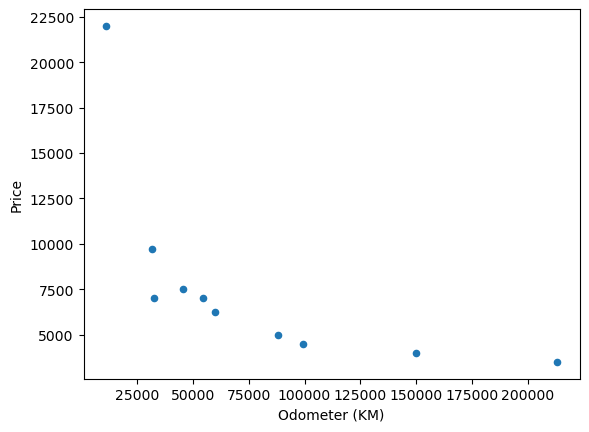

In [39]:
# Convert Price to int
car_sales["Price"] = car_sales["Price"].astype(int) 
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

### Bar
* Concept
* DataFrame

In [40]:
x = np.random.rand(10, 4)
x

array([[0.86417837, 0.12189295, 0.45058153, 0.90473061],
       [0.76695657, 0.34522896, 0.89218248, 0.14310741],
       [0.9066186 , 0.7485476 , 0.94414354, 0.9915763 ],
       [0.99271239, 0.93099667, 0.70324149, 0.07793677],
       [0.40015312, 0.80518524, 0.65356319, 0.02791506],
       [0.21459192, 0.37498932, 0.98781407, 0.49591764],
       [0.72912513, 0.4967195 , 0.118657  , 0.76089612],
       [0.84064357, 0.09932142, 0.07908156, 0.22000698],
       [0.62810282, 0.12378502, 0.31136531, 0.04407667],
       [0.41855262, 0.43585549, 0.0822441 , 0.7543503 ]])

In [41]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.864178,0.121893,0.450582,0.904731
1,0.766957,0.345229,0.892182,0.143107
2,0.906619,0.748548,0.944144,0.991576
3,0.992712,0.930997,0.703241,0.077937
4,0.400153,0.805185,0.653563,0.027915
5,0.214592,0.374989,0.987814,0.495918
6,0.729125,0.496719,0.118657,0.760896
7,0.840644,0.099321,0.079082,0.220007
8,0.628103,0.123785,0.311365,0.044077
9,0.418553,0.435855,0.082244,0.754350


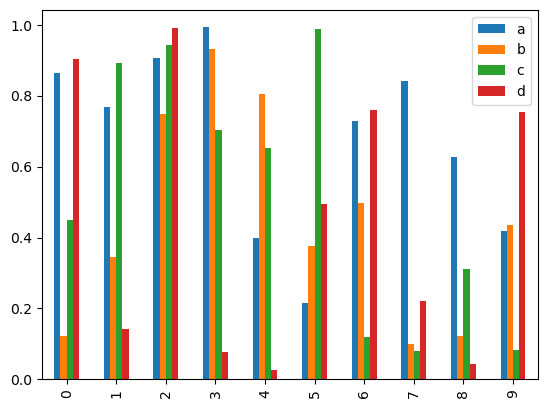

In [42]:
df.plot.bar();

In [43]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


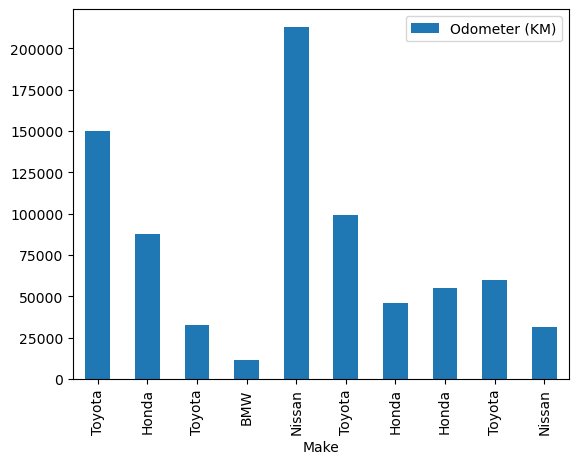

In [44]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

### Histograms

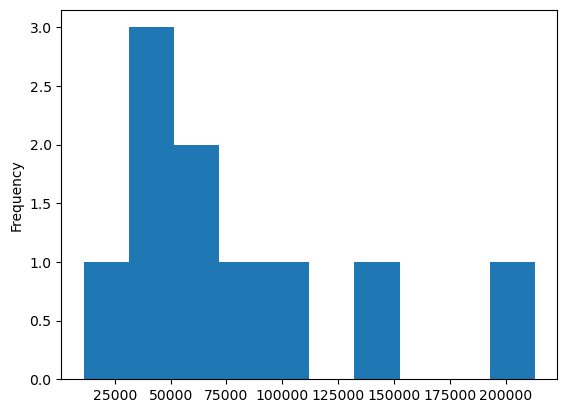

In [45]:
car_sales["Odometer (KM)"].plot.hist();

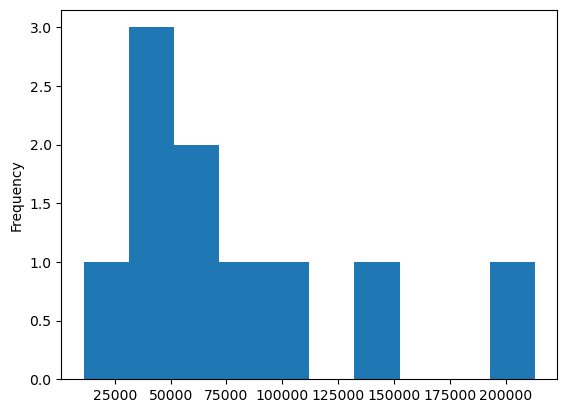

In [46]:
car_sales["Odometer (KM)"].plot(kind="hist");

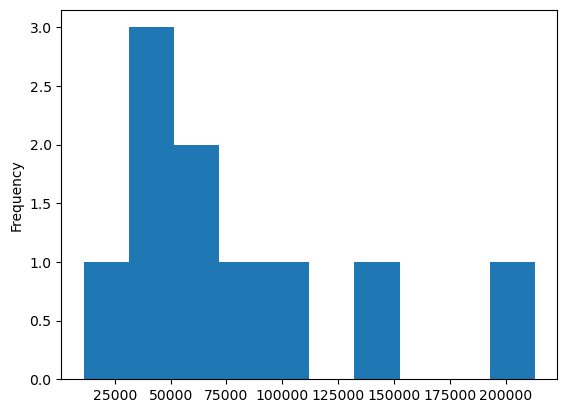

In [49]:
car_sales["Odometer (KM)"].plot.hist(bins=10);

In [52]:
# Let's try with another dataset
heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


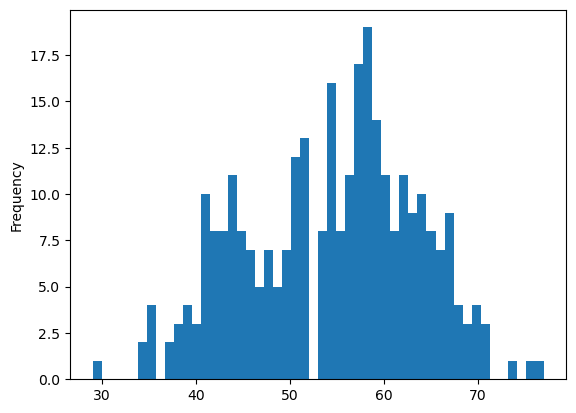

In [53]:
heart_disease["age"].plot.hist(bins=50);

### Subplots
* Concept
* DataFrame

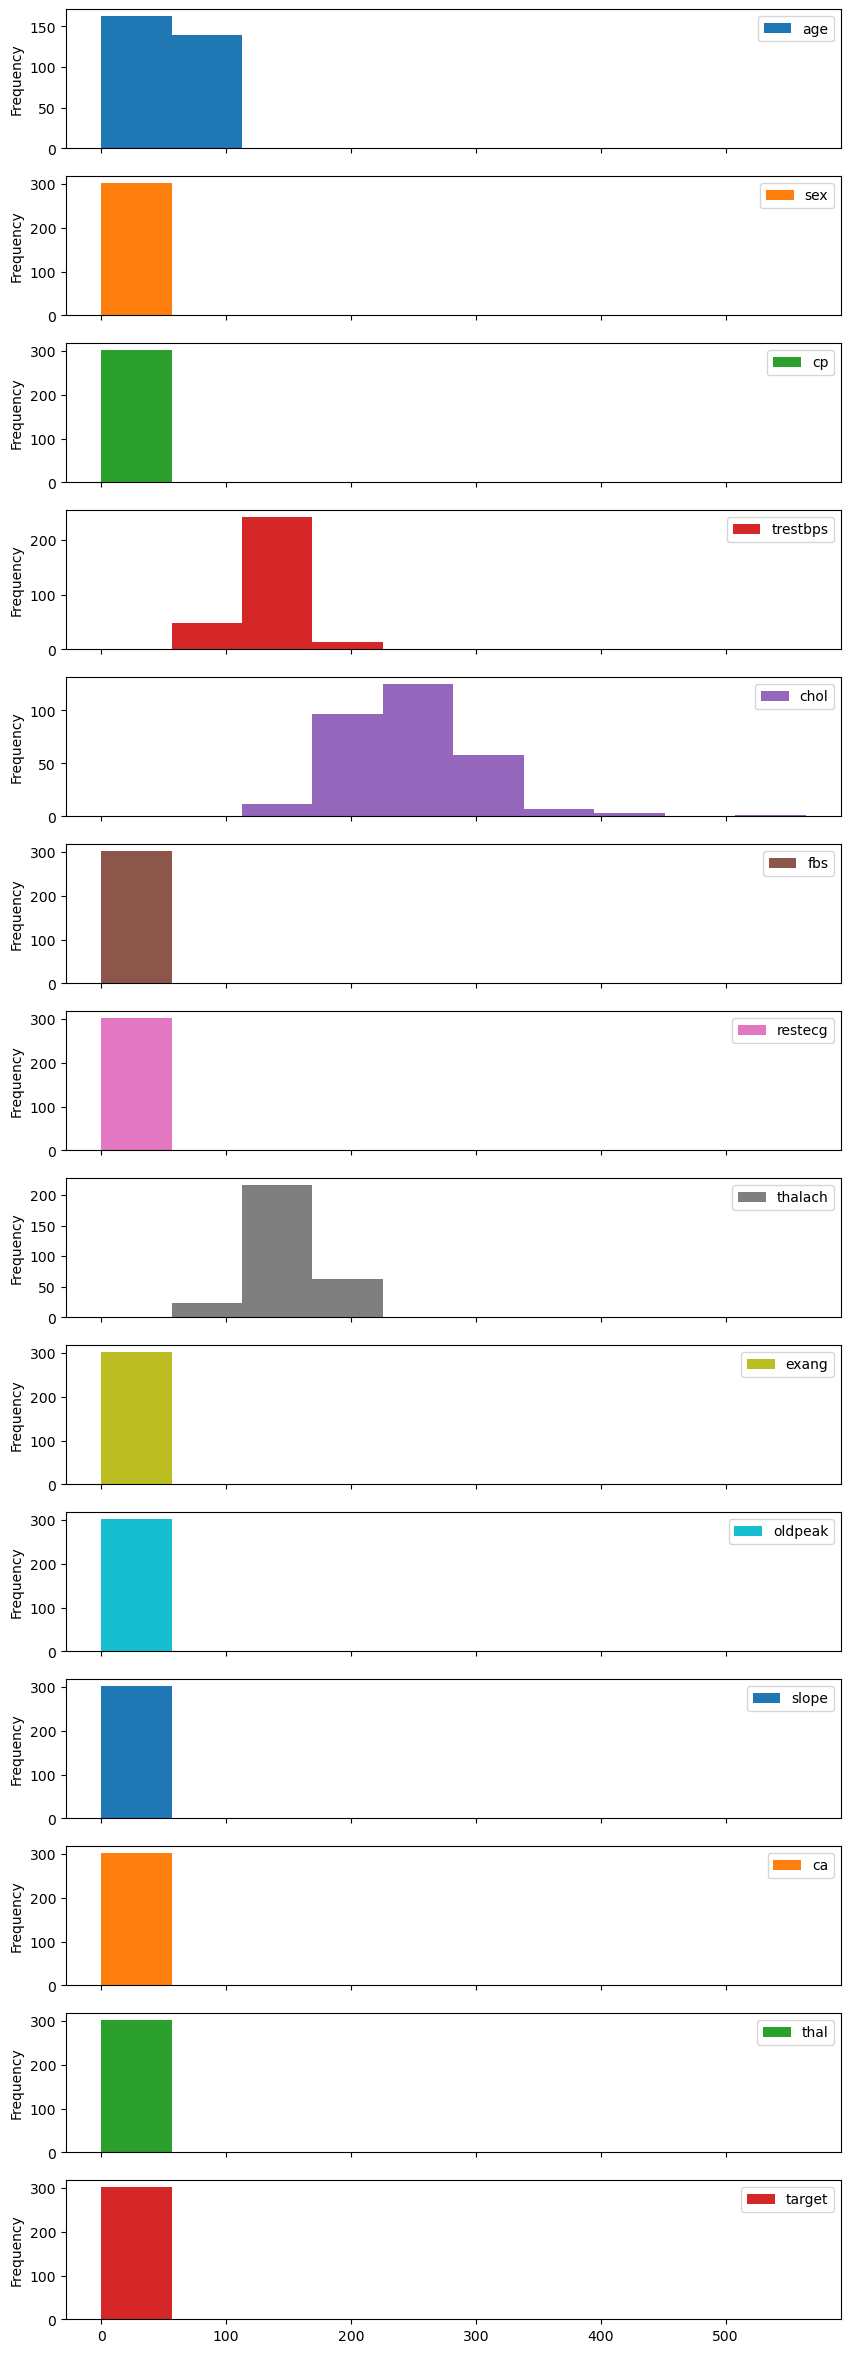

In [55]:
heart_disease.plot.hist(figsize=(10,30),subplots=True);

## 4. Plotting with pandas using the OO method
For more complicated plots, you'll want to use the OO method.

In [56]:
# Perform data analysis on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


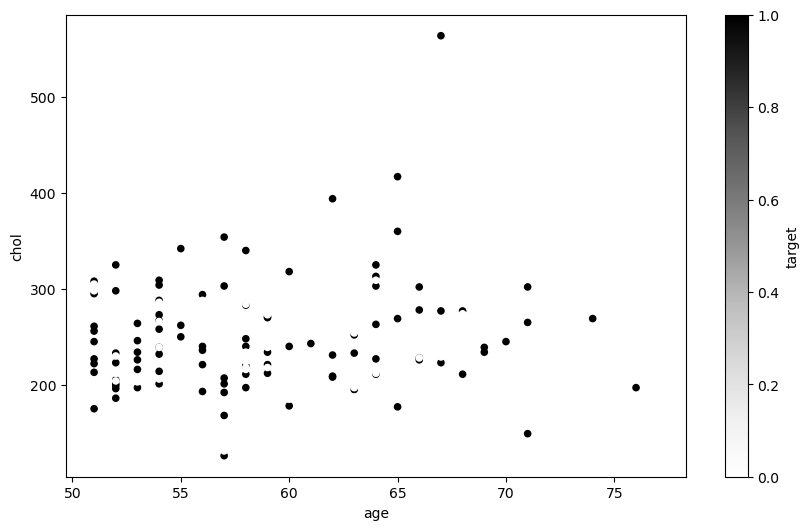

In [59]:
over_50.plot(kind='scatter', 
             x='age', 
             y='chol', 
             c='target', 
             figsize=(10, 6));

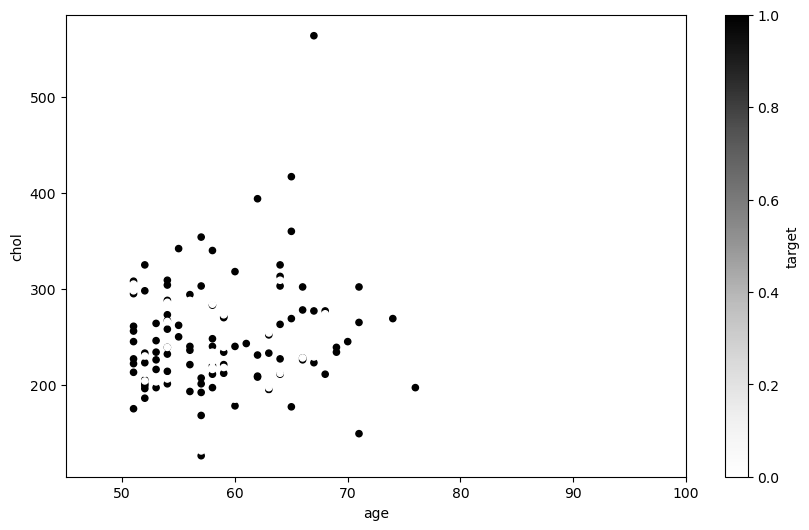

In [60]:
# Object Orianted method
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter', 
             x="age", 
             y="chol", 
             c='target', 
             ax=ax);

ax.set_xlim([45, 100]);

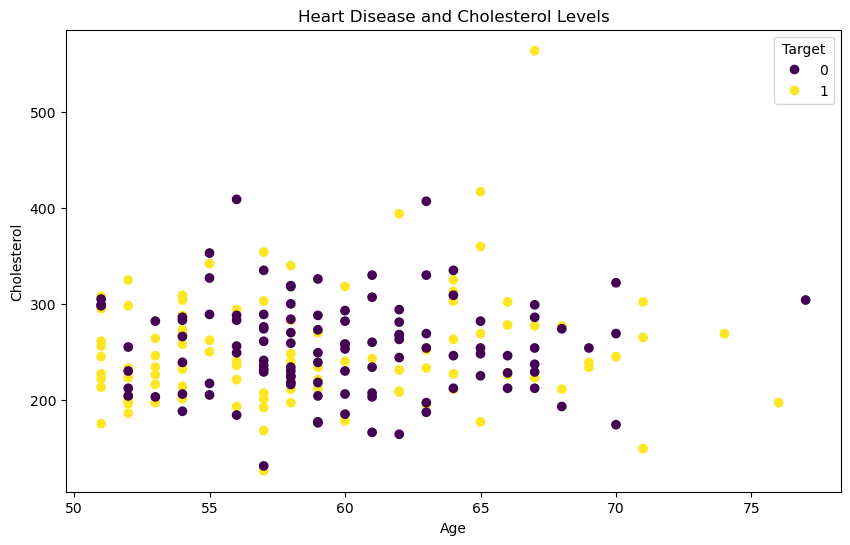

In [61]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target");

What if we wanted a horizontal line going across with the mean of `heart_disease["chol"]`?

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axhline.html

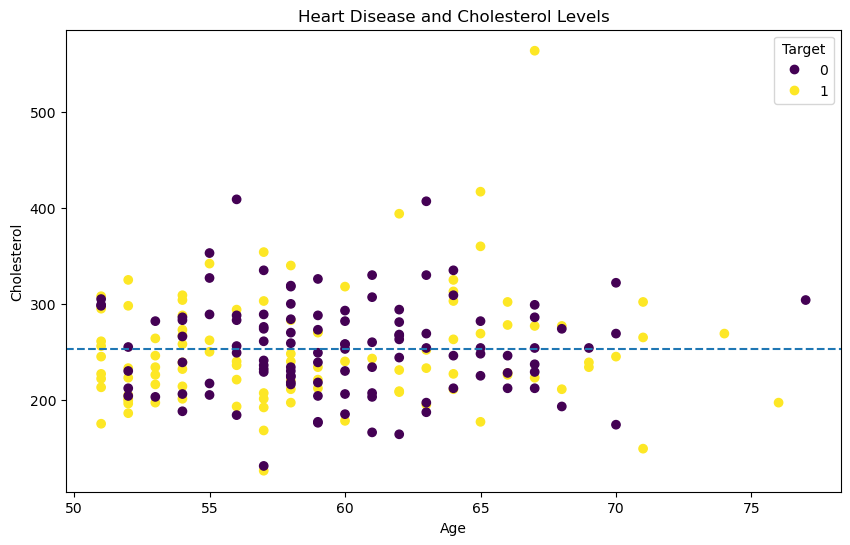

In [62]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

### Adding another plot to existing styled one

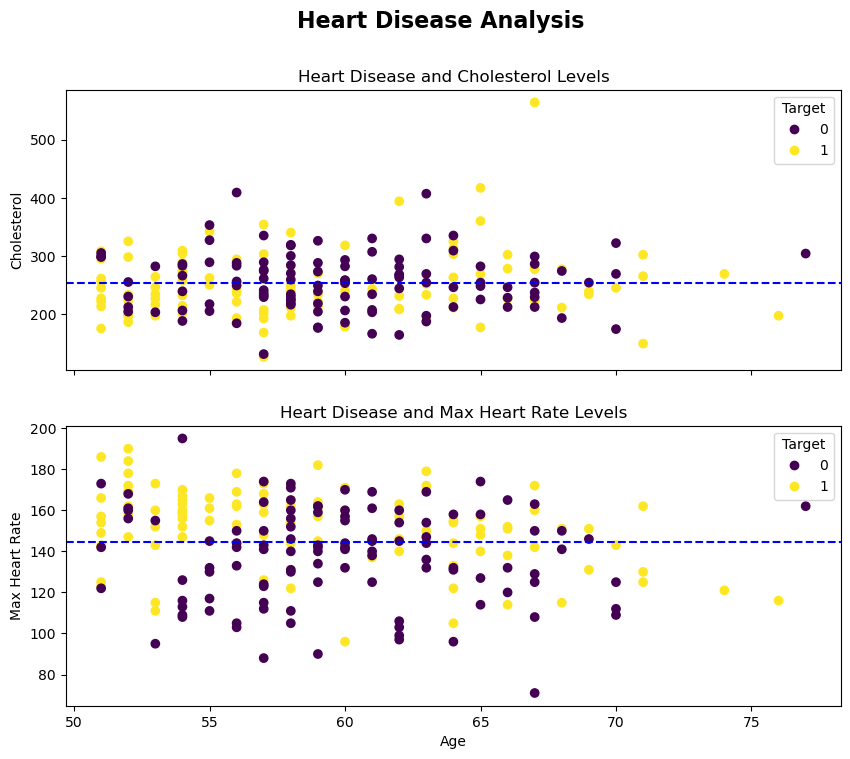

In [63]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 8))

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")


# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

### 5. Customizing your plots
* `limits (xlim, ylim)`, `colors`, `styles`, `legends`
* Style

In [64]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

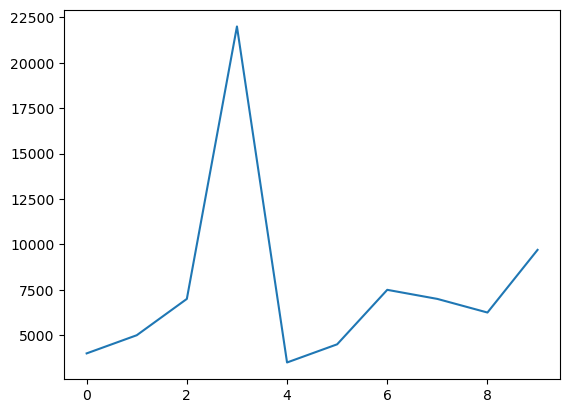

In [65]:
# Plot before changing style
car_sales["Price"].plot();

In [66]:
# Change the style... 
plt.style.use('seaborn-whitegrid')

C:\Users\Sourav\AppData\Local\Temp\ipykernel_4620\327593447.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


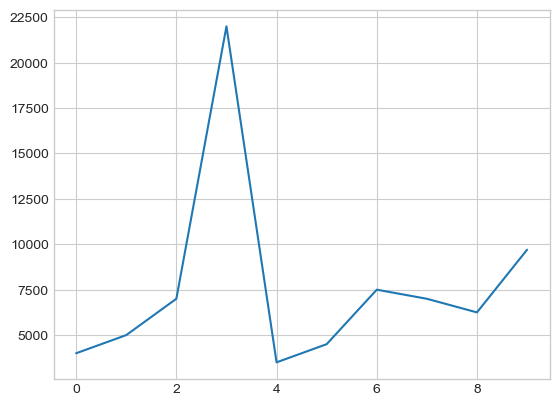

In [67]:
car_sales["Price"].plot();

In [68]:
plt.style.use('seaborn')

C:\Users\Sourav\AppData\Local\Temp\ipykernel_4620\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


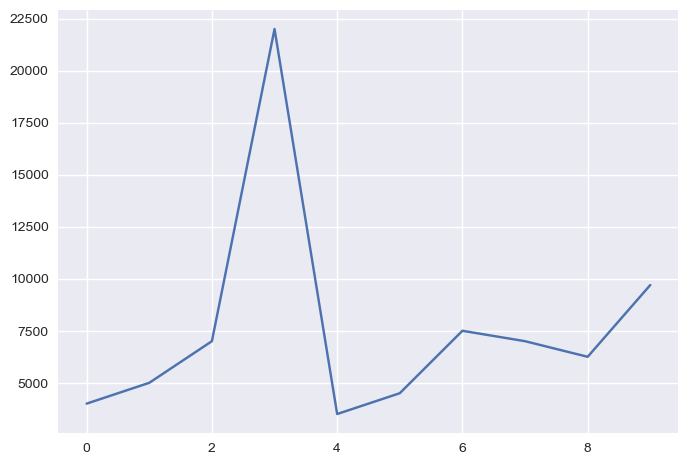

In [69]:
car_sales["Price"].plot();

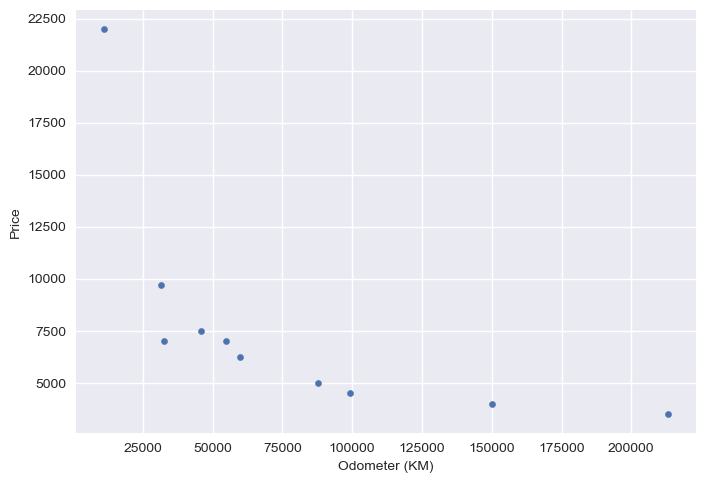

In [70]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [71]:
plt.style.use('ggplot')

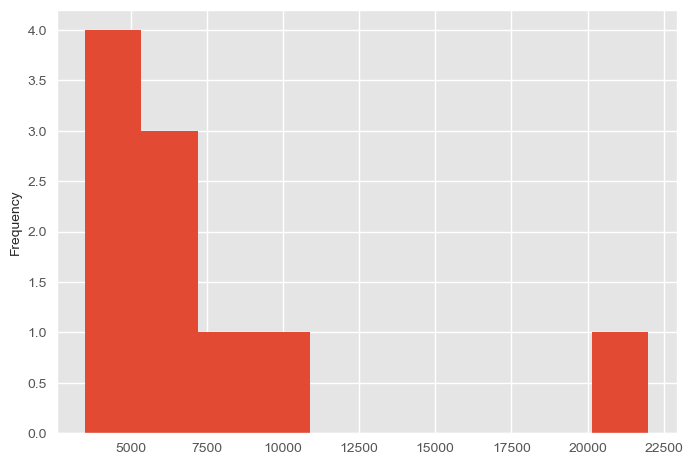

In [72]:
car_sales["Price"].plot.hist();

### Changing the title, legend, axes

In [73]:
x = np.random.randn(10, 4)
x

array([[-0.21006984, -0.79199671,  0.77601304,  1.19052908],
       [-1.14540285, -0.53248181,  0.91779343, -1.66749243],
       [ 0.37140214,  1.91363797, -0.44985014, -1.63465911],
       [ 0.10755372,  2.03166213,  0.9596422 , -1.38152448],
       [ 0.1831976 , -1.01148221, -0.79840815,  0.95055943],
       [-0.43397135,  1.16274308,  1.49125497, -0.13875582],
       [ 0.30279115,  0.57106379, -0.62142197,  0.24429944],
       [-1.06674656,  0.36510174, -0.03852082, -1.36482851],
       [-0.01513594, -0.26695676,  1.56347981, -0.37374629],
       [-0.16262413, -0.08607197,  1.03739632,  2.213526  ]])

In [74]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-0.210070,-0.791997,0.776013,1.190529
1,-1.145403,-0.532482,0.917793,-1.667492
2,0.371402,1.913638,-0.449850,-1.634659
3,0.107554,2.031662,0.959642,-1.381524
4,0.183198,-1.011482,-0.798408,0.950559
5,-0.433971,1.162743,1.491255,-0.138756
6,0.302791,0.571064,-0.621422,0.244299
7,-1.066747,0.365102,-0.038521,-1.364829
8,-0.015136,-0.266957,1.563480,-0.373746
9,-0.162624,-0.086072,1.037396,2.213526


matplotlib.axes._axes.Axes

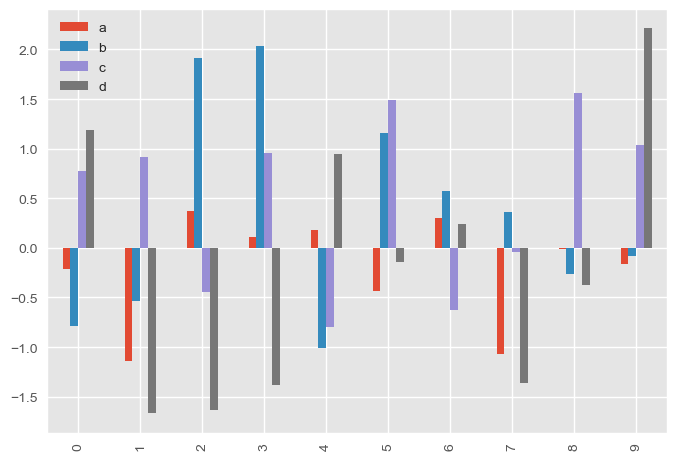

In [75]:
ax = df.plot(kind='bar')
type(ax)

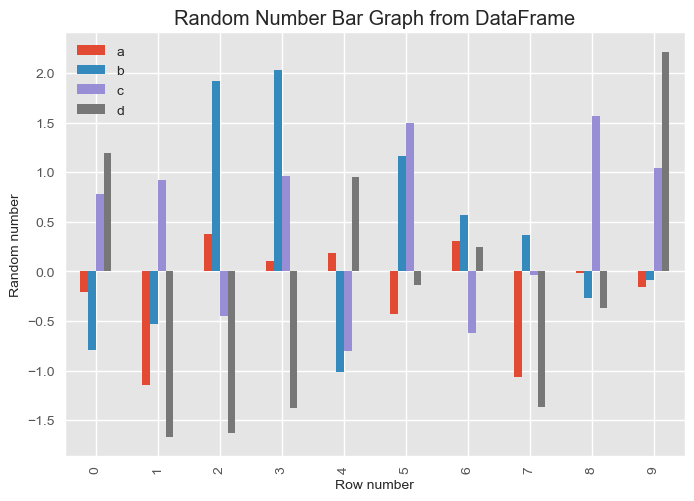

In [76]:
ax = df.plot(kind='bar')
ax.set(title="Random Number Bar Graph from DataFrame", 
       xlabel="Row number", 
       ylabel="Random number")
ax.legend().set_visible(True)

### Changing the cmap

In [77]:
plt.style.use('seaborn-whitegrid')

C:\Users\Sourav\AppData\Local\Temp\ipykernel_4620\2414357448.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


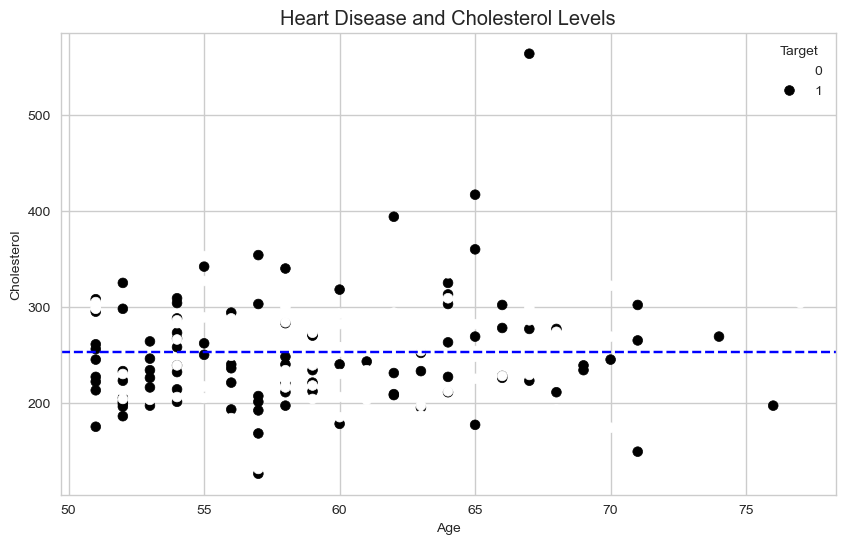

In [78]:
# No cmap change
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.axhline(y=over_50["chol"].mean(), 
           c='b', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

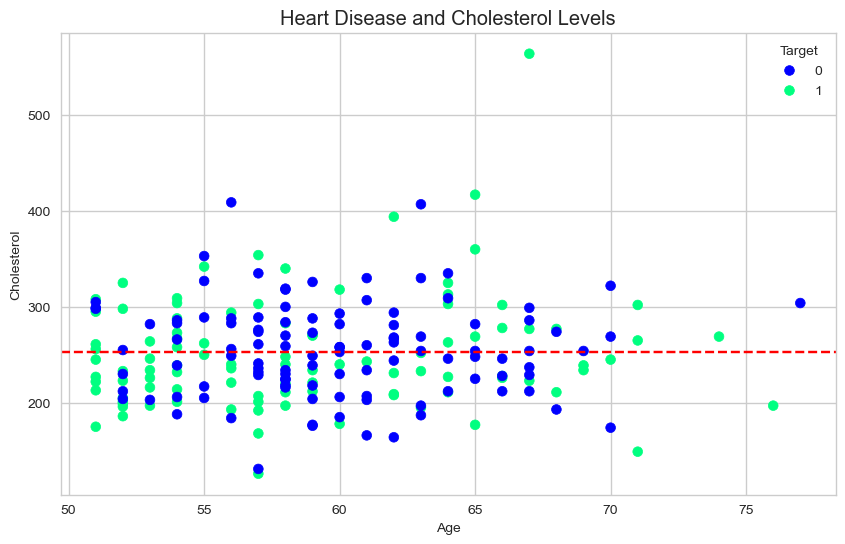

In [79]:
# Change cmap and horizontal line to be a different colour
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"], 
                     cmap="winter")
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")
ax.axhline(y=over_50["chol"].mean(), 
           color='r', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

### Changing the xlim & ylim

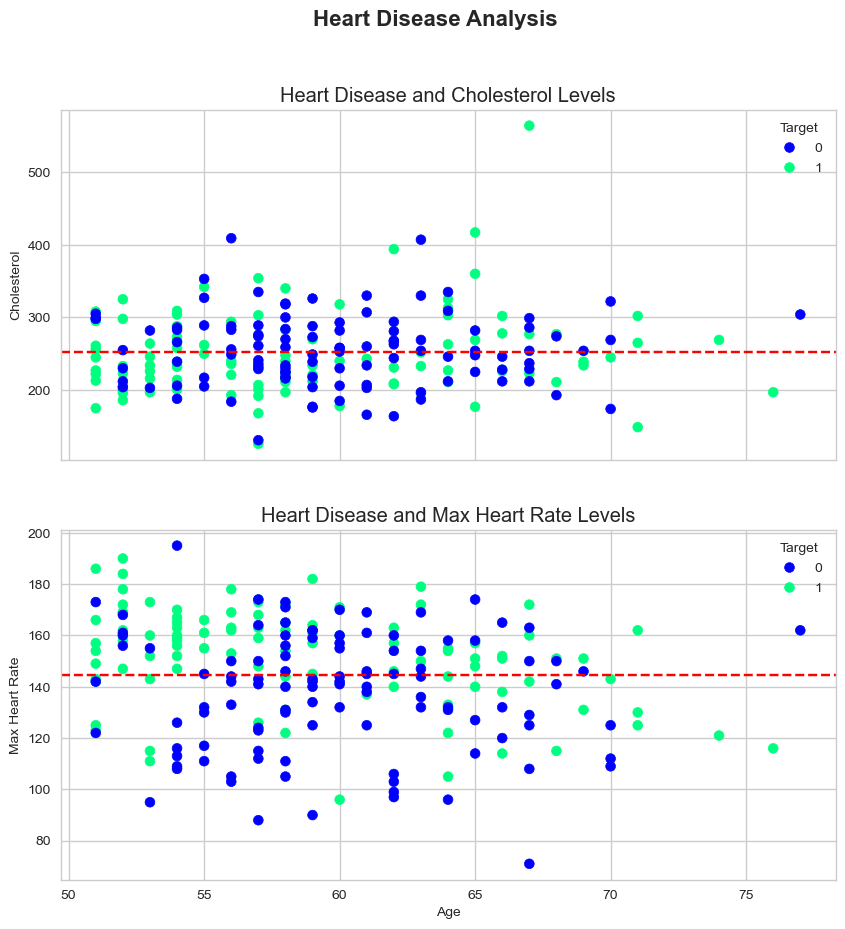

In [80]:
## Before the change (we've had color updates)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

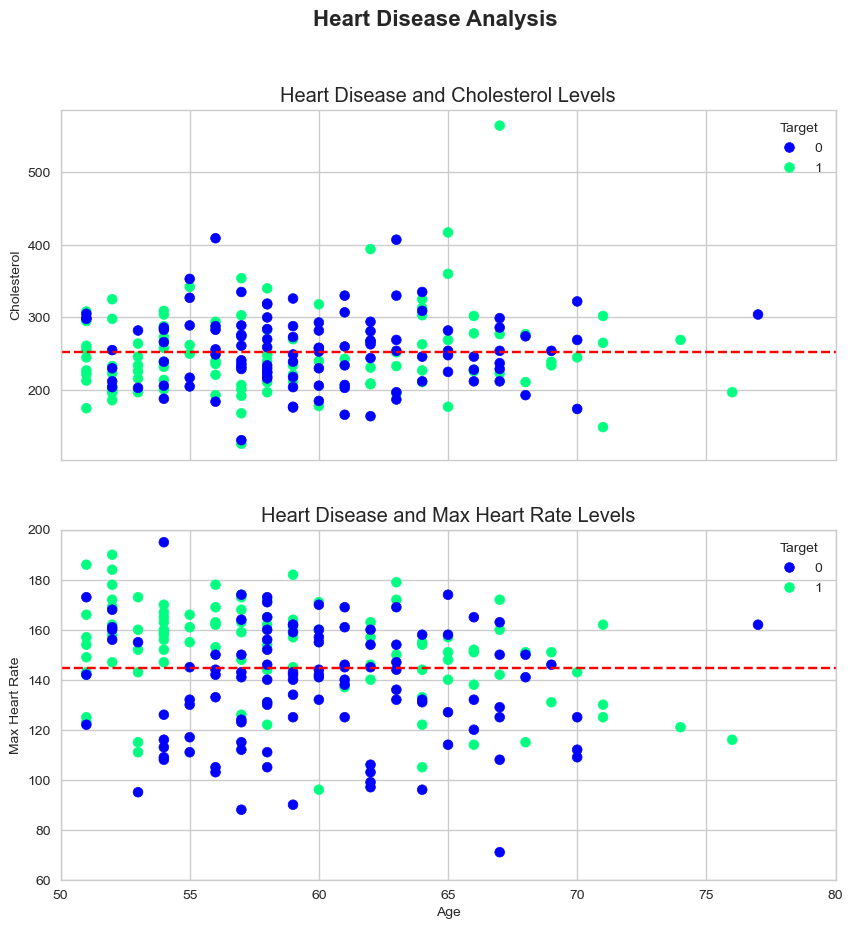

In [81]:
## After adding in different x & y limitations

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

### 6. Saving plots
* Saving plots to images using figsave()

If you're doing something like this often, to save writing excess code, you might put it into a function.

A function which follows the Matplotlib workflow.

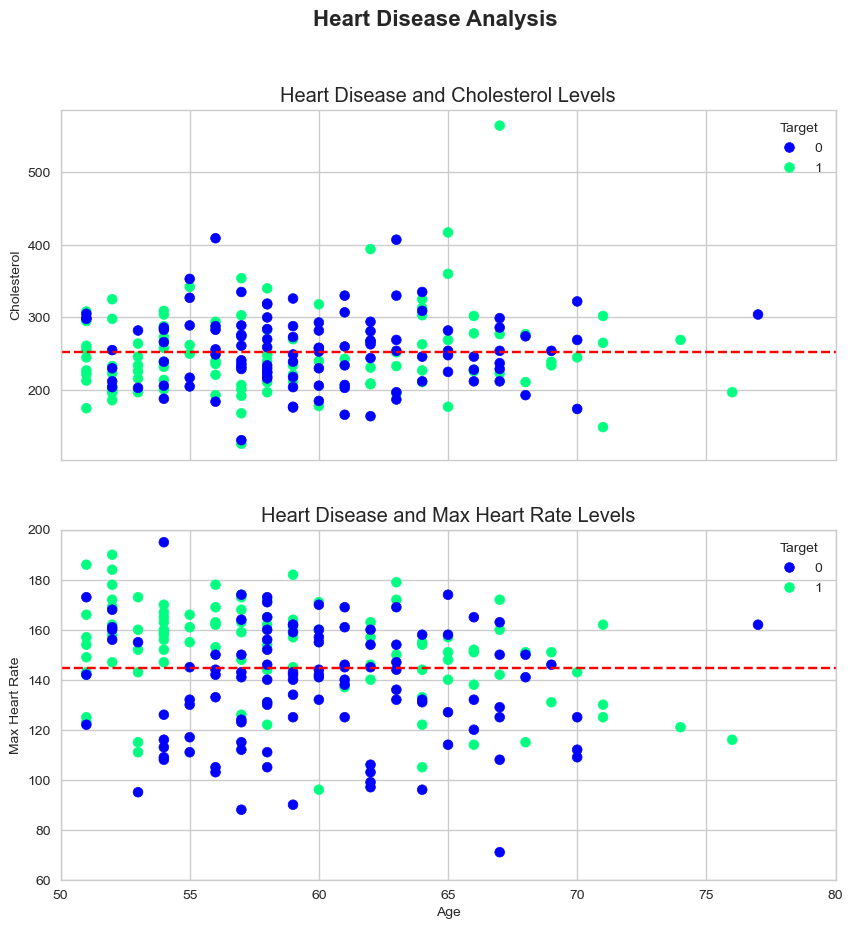

In [82]:
# Axis 0, 1 (row 0, column 0)
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

In [83]:
# Check the supported filetypes
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

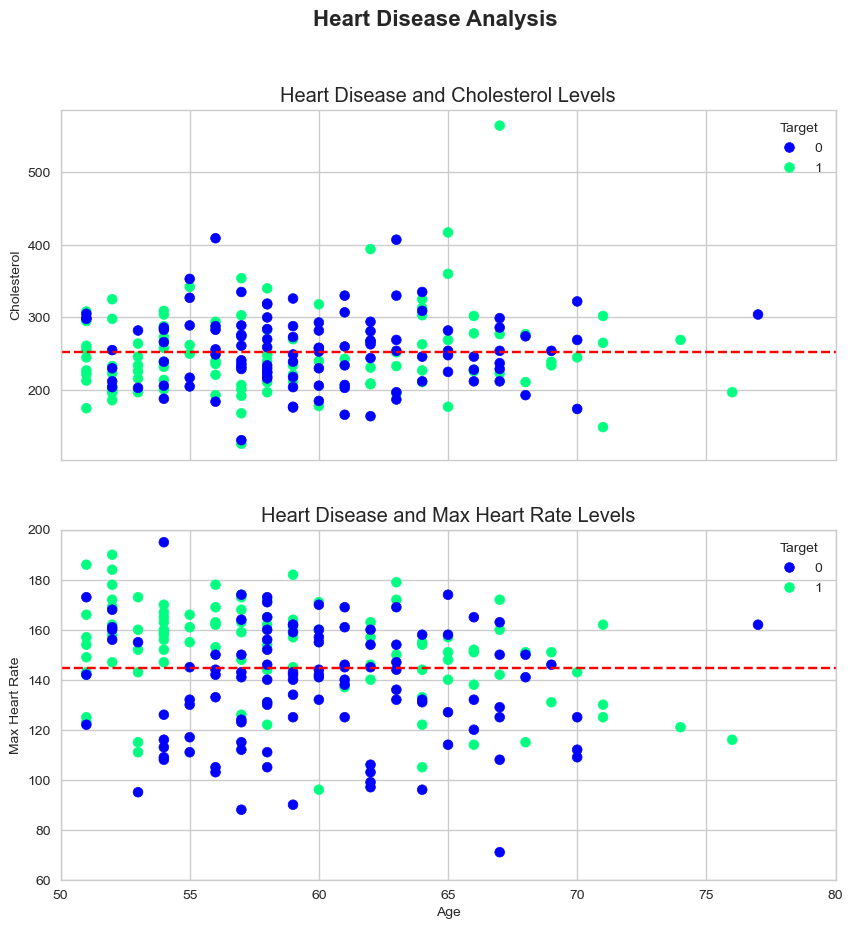

In [84]:
fig

In [85]:
# Save the file
fig.savefig("./images/heart-disease-analysis.png")

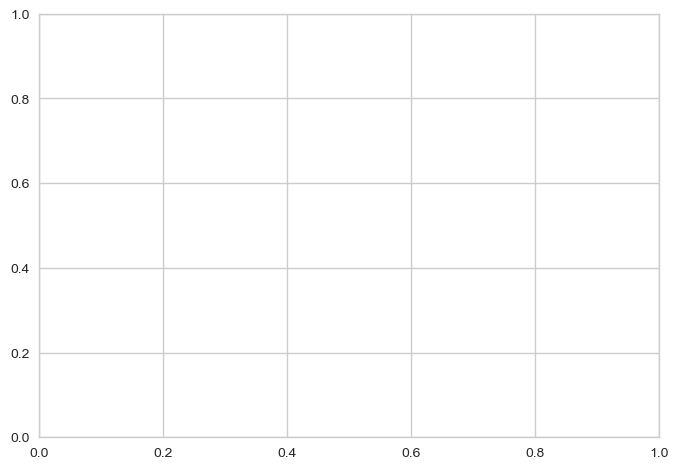

In [86]:
# Resets figure
fig, ax = plt.subplots()